# OpenCV Drillbit Detection

In [1]:
import os
HOME = os.getcwd()
%cd {HOME}

%cd {HOME}/drillbit/JPEGImages
Image_Folder = os.getcwd()
%cd {Image_Folder}
%ls

/home/skyarrow/Workspace/OpenCV-Drillbit-Detection
/home/skyarrow/Workspace/OpenCV-Drillbit-Detection/drillbit/JPEGImages
/home/skyarrow/Workspace/OpenCV-Drillbit-Detection/drillbit/JPEGImages
Drillbit10.jpg                  Image_cropped1_hough_40_10.jpg
Drillbit11.jpg                  Image_cropped1_hough_40_20.jpg
Drillbit1.jpg                   Image_cropped1_hough_40_30.jpg
Drillbit2.jpg                   Image_cropped1_hough_40_40.jpg
Drillbit3.jpg                   Image_cropped1_hough_50_10.jpg
Drillbit4.jpg                   Image_cropped1_hough_50_20.jpg
Drillbit5.jpg                   Image_cropped1_hough_50_30.jpg
Drillbit6.jpg                   Image_cropped1_hough_50_40.jpg
Drillbit7.jpg                   Image_cropped1_hough_60_10.jpg
Drillbit8.jpg                   Image_cropped1_hough_60_20.jpg
Drillbit9.jpg                   Image_cropped1_hough_60_30.jpg
Image_cropped1_hough_10_10.jpg  Image_cropped1_hough_60_40.jpg
Image_cropped1_hough_10_20.jpg  Image_cropped1_houg

# Method 1. Hough Circles Detection

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image

# Read the image
src = cv2.imread('/home/skyarrow/Workspace/OpenCV-Drillbit-Detection/drillbit/JPEGImages/Image_cropped1.jpg')
img = src.copy()

# Convert to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur
# img_blur = cv2.medianBlur(img_gray, 5)

# Perform Hough Circle detection
# circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 10, param1=20, param2=40, minRadius=0, maxRadius=40)

# print(len(circles))
# # 将检测结果绘制在图像上
# if len(circles) > 0:
#     for i in circles[0, :]:  # 遍历矩阵的每一行的数据
#         # 绘制圆形
#         cv2.circle(img, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 2)
#         # 绘制圆心
#         cv2.circle(img, (int(i[0]), int(i[1])), 2, (255, 0, 0), -1)
        
# cv2.imwrite('/home/skyarrow/Workspace/OpenCV-Drillbit-Detection/drillbit/JPEGImages/Image_cropped1_hough.jpg', img)

for param1 in range(10, 100, 10):
    for param2 in range(10, 100, 10):
        circles = cv2.HoughCircles(img_gray, cv2.HOUGH_GRADIENT, 1, 10, param1=param1, param2=param2, minRadius=0, maxRadius=40)
        
        img_now = src.copy()
        if circles is not None:
            for i in circles[0, :]:  # 遍历矩阵的每一行的数据
                # 绘制圆形
                cv2.circle(img_now, (int(i[0]), int(i[1])), int(i[2]), (255, 0, 0), 2)
                # 绘制圆心
                cv2.circle(img_now, (int(i[0]), int(i[1])), 2, (255, 0, 0), -1)
                
            print(f'param1: {param1}, param2: {param2}, circles: {len(circles)}')
            cv2.imwrite(f'/home/skyarrow/Workspace/OpenCV-Drillbit-Detection/drillbit/JPEGImages/Image_cropped1_hough_{param1}_{param2}.jpg', img_now)
        
        
# 显示图像
# fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 8), dpi=100)
# axes[0].imshow(src[:, :, ::-1])
# axes[0].set_title("原图")
# axes[1].imshow(img[:, :, ::-1])
# axes[1].set_title("霍夫圆检测后的图像")
# plt.show()


param1: 10, param2: 10, circles: 1
param1: 10, param2: 20, circles: 1
param1: 10, param2: 30, circles: 1
param1: 10, param2: 40, circles: 1
param1: 20, param2: 10, circles: 1
param1: 20, param2: 20, circles: 1
param1: 20, param2: 30, circles: 1
param1: 20, param2: 40, circles: 1
param1: 20, param2: 50, circles: 1
param1: 30, param2: 10, circles: 1
param1: 30, param2: 20, circles: 1
param1: 30, param2: 30, circles: 1
param1: 30, param2: 40, circles: 1
param1: 40, param2: 10, circles: 1
param1: 40, param2: 20, circles: 1
param1: 40, param2: 30, circles: 1
param1: 40, param2: 40, circles: 1
param1: 50, param2: 10, circles: 1
param1: 50, param2: 20, circles: 1
param1: 50, param2: 30, circles: 1
param1: 50, param2: 40, circles: 1
param1: 60, param2: 10, circles: 1
param1: 60, param2: 20, circles: 1
param1: 60, param2: 30, circles: 1
param1: 60, param2: 40, circles: 1
param1: 70, param2: 10, circles: 1
param1: 70, param2: 20, circles: 1
param1: 70, param2: 30, circles: 1
param1: 70, param2: 

# Method 2. Contour Detection

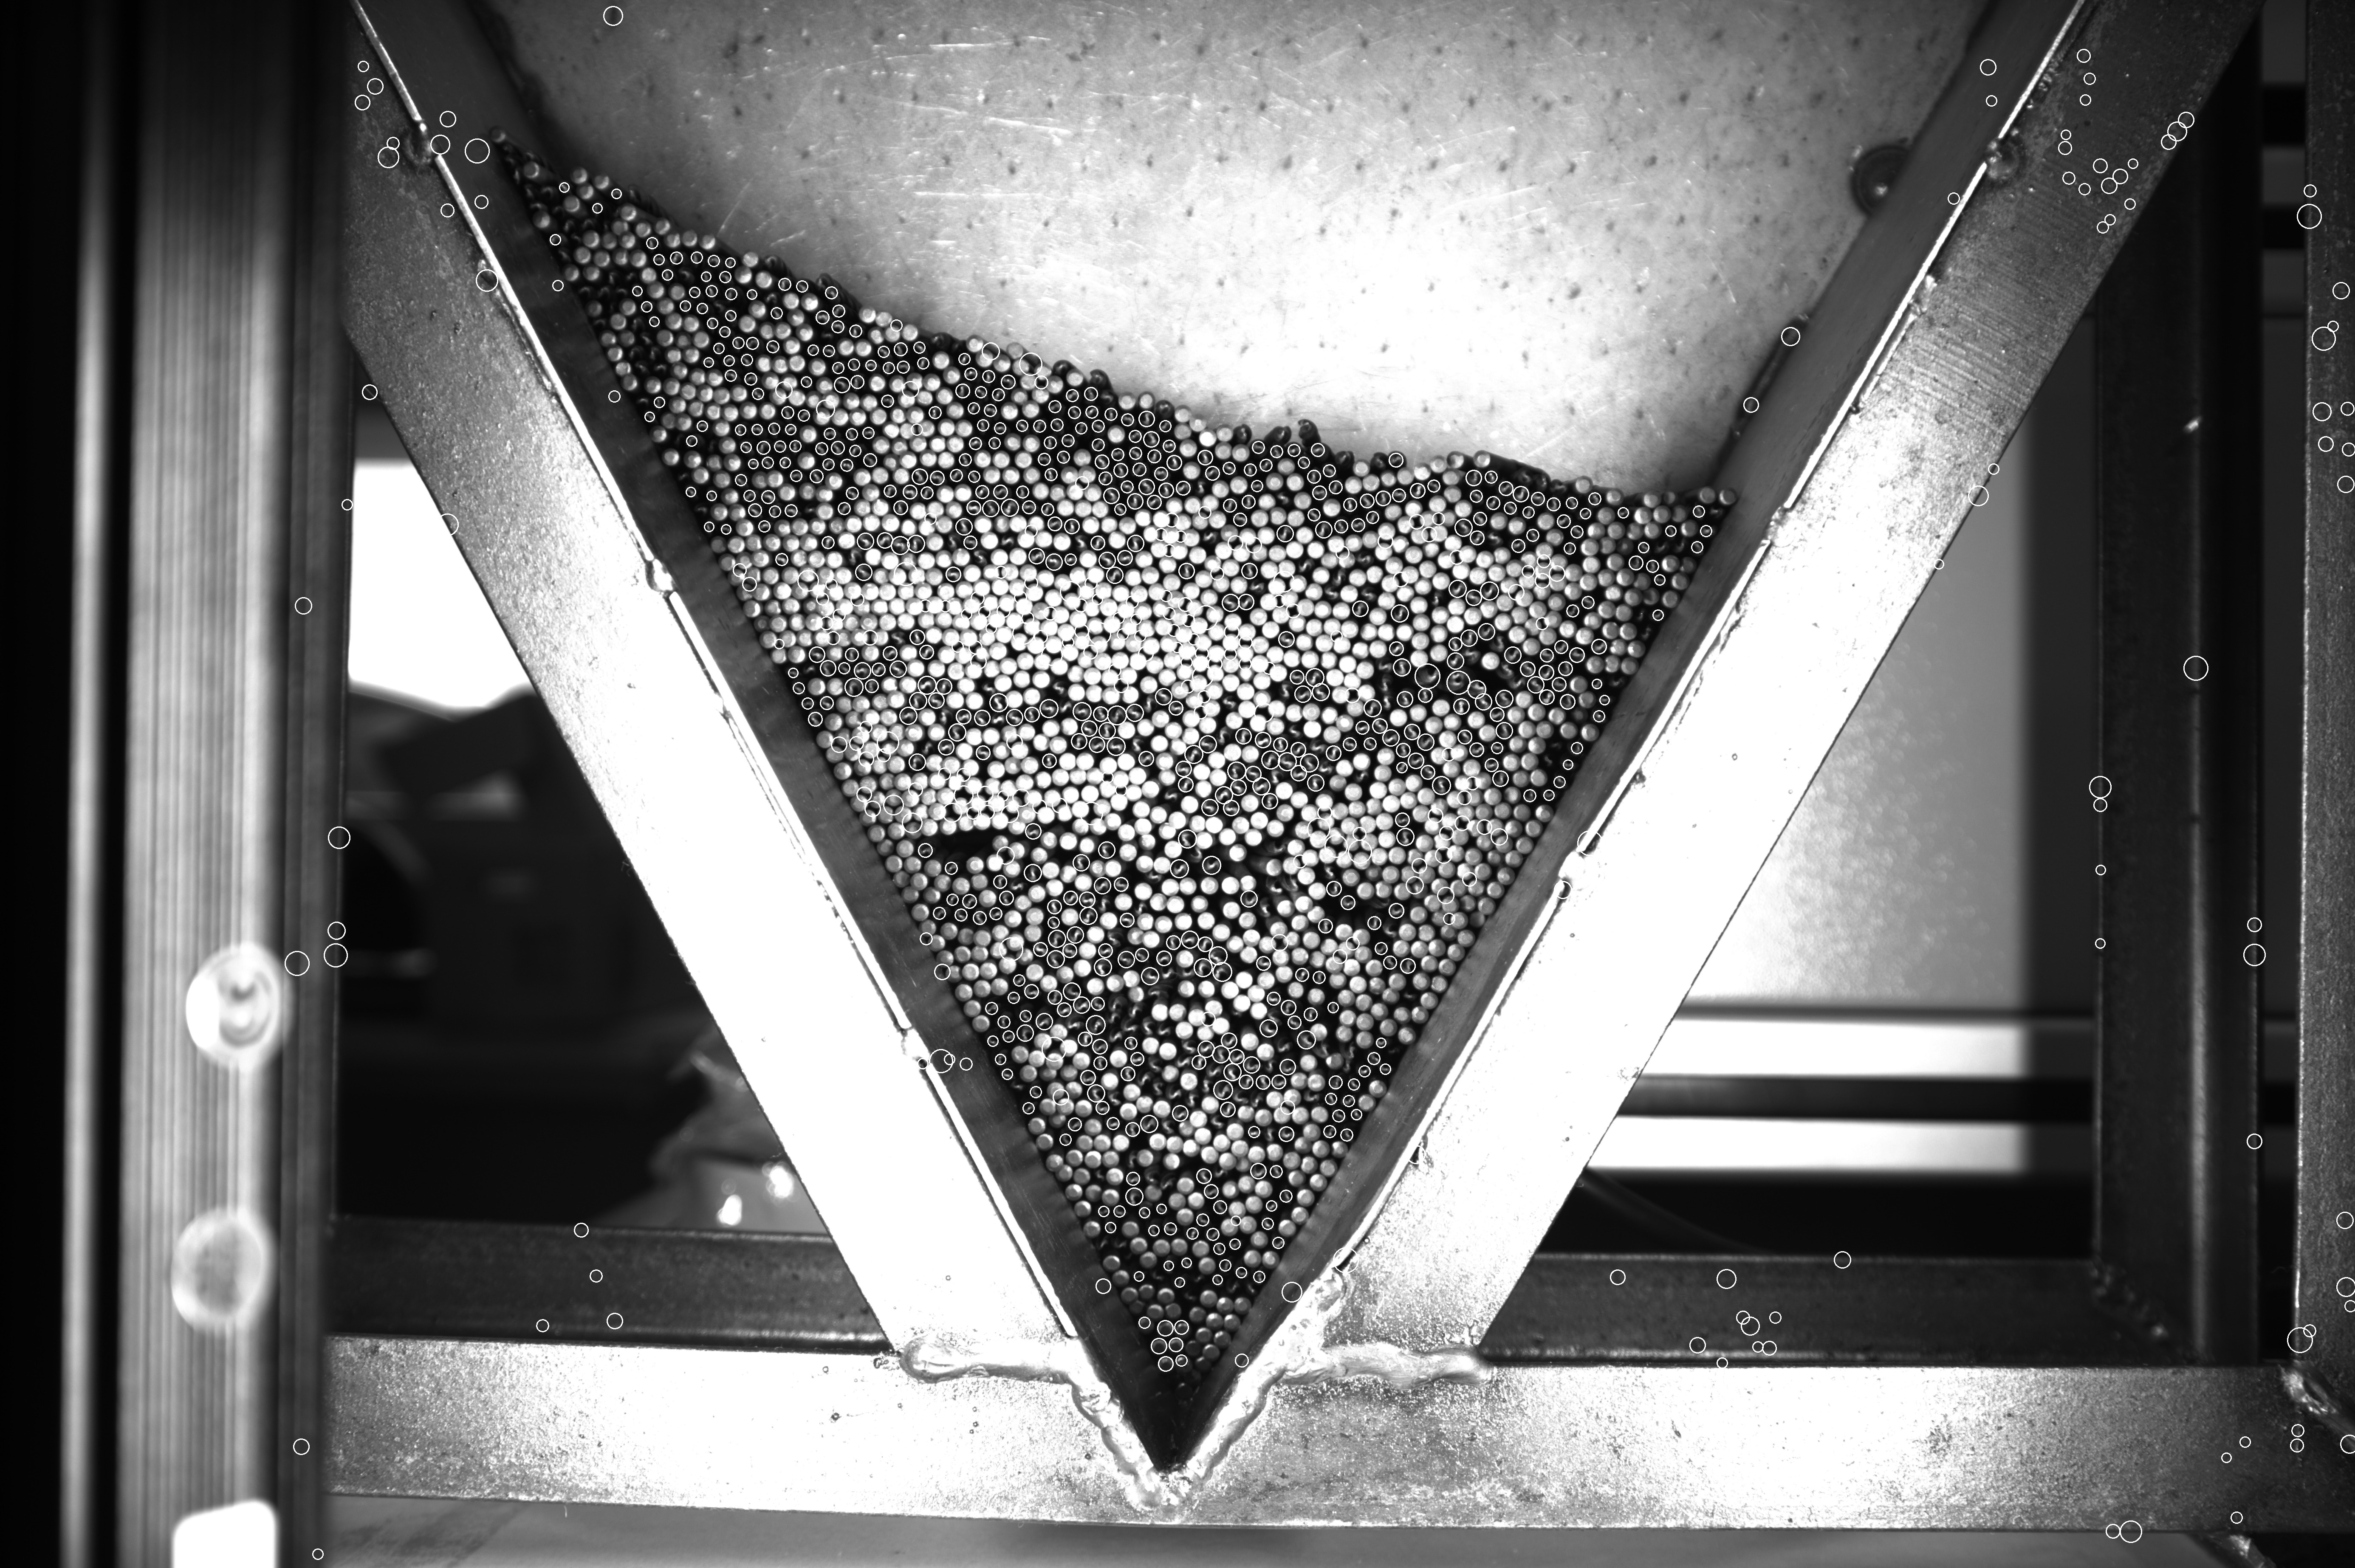

In [21]:
# Read the image
img = cv2.imread('Drillbit1.jpg', 0)

# Threshold the image
_, thresh = cv2.threshold(img, 50, 255, 0)

# Find contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)



# cv2.drawContours(img, contours, -1, (255,255,0), 3)
# cv2.imwrite('Image_cropped1_contours.jpg', img)
# Image('Image_cropped1_contours.jpg')

# For each contour, find the min enclosing circle and draw it on the original image
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    area_circle = np.pi * radius**2
    area = cv2.contourArea(contour)
    if radius > 10 and radius < 30 and area/area_circle < 0.5:  # Only consider contours with radius greater than 10
        
        cv2.circle(img, center, radius, (255, 0, 0), 2)

# Save the image with contours
cv2.imwrite('Image_cropped1_contours_filtered.jpg', img)
Image('Image_cropped1_contours_filtered.jpg')